# Data

The data is originally taken from the free-to-use resource: https://www.kaggle.com/mczielinski/bitcoin-historical-data/download

In [1]:
import numpy as np
import pandas as pd
from pylab import rcParams
import statsmodels.api as sm
import matplotlib.pyplot as plt

# References that can help understand the nature of the code applied:
# https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b
# https://stackoverflow.com/questions/42425774/using-statsmodels-seasonal-decompose-without-datetimeindex-but-with-known-freq?noredirect=1&lq=1

In [2]:
df = pd.read_csv('coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv')
# df = df[-500000:]
df["Timestamp"] = pd.to_datetime(df['Timestamp'],unit='s')

In [3]:
df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2014-12-01 05:33:00,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000
1,2014-12-01 05:34:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-12-01 05:35:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-12-01 05:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-12-01 05:37:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2099755,2019-01-07 22:02:00,4006.01,4006.57,4006.00,4006.01,3.382954,13553.433078,4006.390309
2099756,2019-01-07 22:03:00,4006.01,4006.57,4006.00,4006.01,0.902164,3614.083169,4006.017233
2099757,2019-01-07 22:04:00,4006.01,4006.01,4006.00,4006.01,1.192123,4775.647308,4006.003635
2099758,2019-01-07 22:05:00,4006.01,4006.01,4005.50,4005.50,2.699700,10814.241898,4005.719991


In [4]:
# Take only the weighted price for evaluations
df_use = df["Weighted_Price"]
df_use

0           300.000000
1                  NaN
2                  NaN
3                  NaN
4                  NaN
              ...     
2099755    4006.390309
2099756    4006.017233
2099757    4006.003635
2099758    4005.719991
2099759    4005.745614
Name: Weighted_Price, Length: 2099760, dtype: float64

C:\Users\20194309\Software\Anaconda\envs\DeepLearning\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


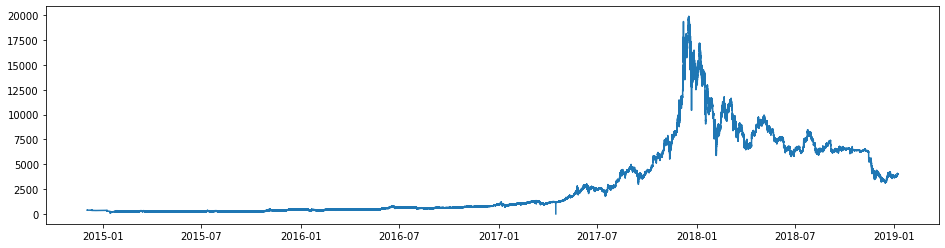

In [5]:
#See full data range
plt.figure(figsize=(16,4))
plt.plot(df["Timestamp"], df_use)
plt.show()

In [6]:
#Reduce the size of the data that can be considered interesting
df_use = df[-(len(df) - df[df["Timestamp"] == "2017-07-01 00:00:00"].index[0]):]
df_final_use = df_use["Weighted_Price"]
df_use.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
1299233,2017-07-01 00:00:00,2455.19,2455.96,2455.19,2455.24,7.218230,17722.398907,2455.227639
1299234,2017-07-01 00:01:00,2455.24,2456.46,2452.23,2453.41,24.240376,59507.337538,2454.885099
1299235,2017-07-01 00:02:00,2453.53,2455.65,2453.40,2454.23,1.902447,4668.924535,2454.167928
1299236,2017-07-01 00:03:00,2454.23,2457.38,2454.23,2457.38,4.641260,11394.423009,2455.028148
1299237,2017-07-01 00:04:00,2457.68,2459.96,2457.68,2459.95,1.381798,3399.052134,2459.876697


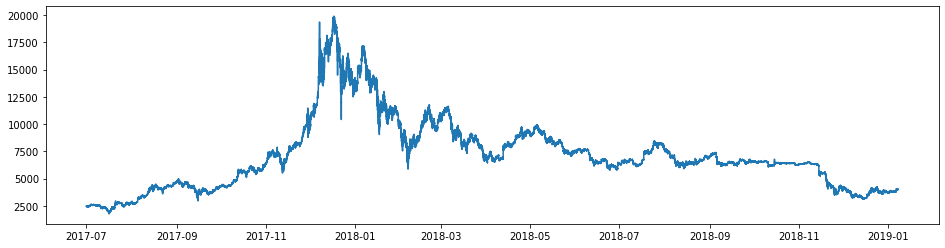

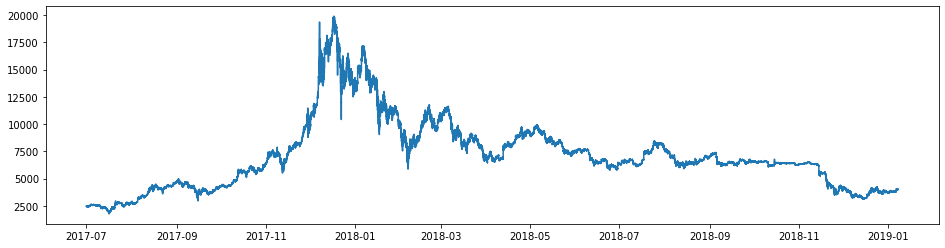

In [7]:
plt.figure(figsize=(16,4))
plt.plot(df_use["Timestamp"], df_use["Weighted_Price"])
plt.show()
#Verify if data was saved and re-saved correctly
plt.figure(figsize=(16,4))
plt.plot(df_use["Timestamp"], df_final_use)
plt.show()

In [8]:
#Find missing data in the period that we are chosing to work with
#Worst case scenario we will reduce it; best - we will have clean data for the full chosen range
print("Amount of data points: \t\t{}".format(len(df_final_use)))
print("Amount of missing data: \t{}".format(df_final_use.isnull().sum()))
print("Amount of not missing data: \t{}".format(df_final_use.notnull().sum()))

Amount of data points: 		800527
Amount of missing data: 	2606
Amount of not missing data: 	797921


In [9]:
#Some missing data is present, let us take a look where, maybe we can just reduce the size of the
#Data set if it is not too crucial, otherwise interpolation might be worth while to resort to
missing_idx = df_final_use[df_final_use.isnull() == True].index
missing_idx

Int64Index([1301339, 1301364, 1304476, 1305446, 1308686, 1308687, 1308689,
            1308690, 1308691, 1308692,
            ...
            2081341, 2081342, 2081343, 2081344, 2081345, 2081346, 2081347,
            2081348, 2081349, 2091915],
           dtype='int64', length=2606)

In [10]:
df_final_use.loc[missing_idx]

1301339   NaN
1301364   NaN
1304476   NaN
1305446   NaN
1308686   NaN
           ..
2081346   NaN
2081347   NaN
2081348   NaN
2081349   NaN
2091915   NaN
Name: Weighted_Price, Length: 2606, dtype: float64

In [11]:
# It seems that the data is missing at random. Simply reducing the range will not help
mising_time = df_use.loc[missing_idx]["Timestamp"]
mising_time

1301339   2017-07-02 11:06:00
1301364   2017-07-02 11:31:00
1304476   2017-07-04 15:23:00
1305446   2017-07-05 07:33:00
1308686   2017-07-07 13:33:00
                  ...        
2081346   2018-12-26 03:13:00
2081347   2018-12-26 03:14:00
2081348   2018-12-26 03:15:00
2081349   2018-12-26 03:16:00
2091915   2019-01-02 11:22:00
Name: Timestamp, Length: 2606, dtype: datetime64[ns]

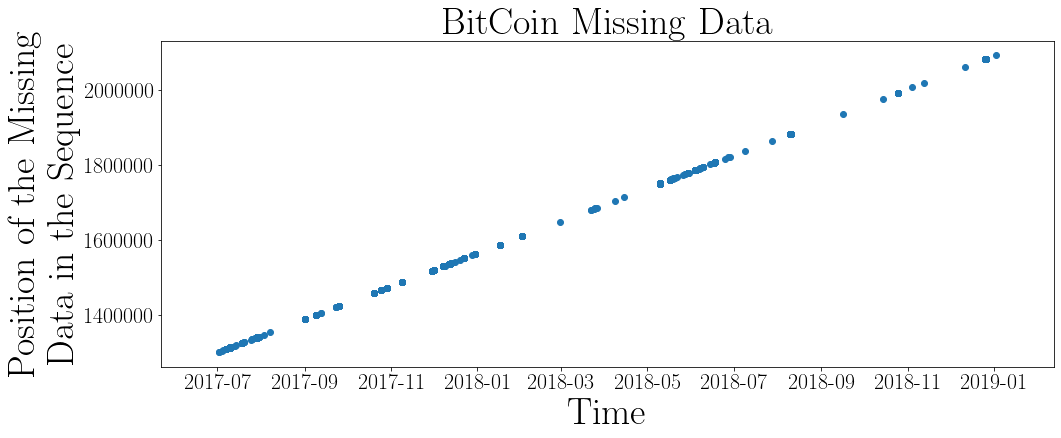

In [13]:
# Verify that the hunch is correct
plt.figure(figsize=(16,6))
plt.scatter(mising_time, missing_idx)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
MEDIUM_SIZE = 22
plt.rc('font', size = MEDIUM_SIZE)      
plt.rc('axes', titlesize = MEDIUM_SIZE)     
plt.rc('axes', labelsize = MEDIUM_SIZE)    
plt.rc('xtick', labelsize = MEDIUM_SIZE)    
plt.rc('ytick', labelsize = MEDIUM_SIZE)    
plt.rc('legend', fontsize = MEDIUM_SIZE)    
plt.rc('figure', titlesize = MEDIUM_SIZE)
plt.xlabel("Time", fontsize=38)
plt.ylabel("Position of the Missing\nData in the Sequence", fontsize=38)
plt.title("BitCoin Missing Data", fontsize=38)
plt.savefig("BitcoinMissingData.pdf", bbox_inches='tight')
plt.show()

In [14]:
#Interpolation (linear)
#Done with the pandas package. Fits the nature as we already do many things with it for data cleaning
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.interpolate.html
df_inter = df_final_use.interpolate()

In [15]:
df_inter

1299233    2455.227639
1299234    2454.885099
1299235    2454.167928
1299236    2455.028148
1299237    2459.876697
              ...     
2099755    4006.390309
2099756    4006.017233
2099757    4006.003635
2099758    4005.719991
2099759    4005.745614
Name: Weighted_Price, Length: 800527, dtype: float64

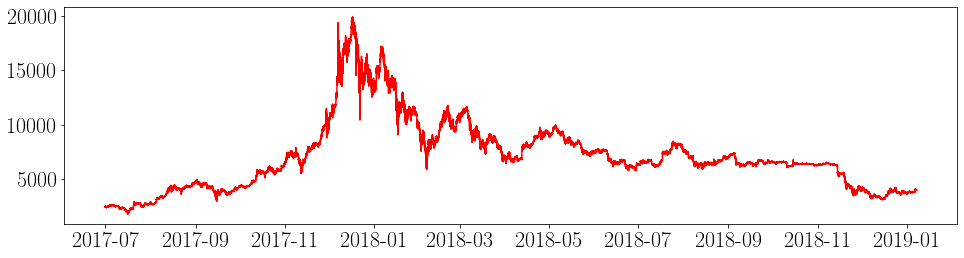

In [16]:
# Check that our fixed data does not produce some glaring outliers visually
plt.figure(figsize=(16,4))
plt.plot(df_use["Timestamp"], df_inter, "r")
# plt.plot(mising_time, df_final_use.loc[missing_idx], "r")
plt.show()

In [17]:
#We can check if previously missing data is now filled with relativelly meaninguful and not weird data
df_inter.loc[missing_idx]

1301339    2429.294987
1301364    2436.735486
1304476    2583.136990
1305446    2557.678204
1308686    2527.839832
              ...     
2081346    3831.219903
2081347    3831.221248
2081348    3831.222593
2081349    3831.223937
2091915    3806.892320
Name: Weighted_Price, Length: 2606, dtype: float64

In [18]:
print("Amount of data points: \t\t{}".format(len(df_inter)))
print("Amount of missing data: \t{}".format(df_inter.isnull().sum()))
print("Amount of not missing data: \t{}".format(df_inter.notnull().sum()))

Amount of data points: 		800527
Amount of missing data: 	0
Amount of not missing data: 	800527


In [19]:
#Checking if data is not missing from deviation standpoint
df = pd.read_csv('coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv')
df_temp = df
df_temp["Timestamp"] = pd.to_datetime(df_temp['Timestamp'],unit='s')
df_temp = df_temp[-(len(df_temp) - df_temp[df_temp["Timestamp"] == "2017-07-01 00:00:00"].index[0]):]

df = pd.read_csv('coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv')
df = df[-len(df_temp):]

# As time steps are in unicode and they are tracked per every minute
# we can easily check if increase is stable and there are no deviations in that
# otherwise we can suspect that some minuts are skipped or recorded incorrectly
time_var = np.array(df["Timestamp"][-len(df):])
print(type(time_var))
print(time_var)

<class 'numpy.ndarray'>
[1498867200 1498867260 1498867320 ... 1546898640 1546898700 1546898760]


In [20]:
differences_holder = []
#distance from a minute to the next will be compared per whole worked range
for i, value in enumerate(time_var):
    if i <= (len(df) - 2):
        differences_holder.append(time_var[i + 1] - value)
        
differences_holder = np.array(differences_holder)

In [21]:
differences_holder

array([60, 60, 60, ..., 60, 60, 60], dtype=int64)

In [22]:
print(np.unique(differences_holder, return_counts = True))
print(np.std(differences_holder))
#For the region that we are looking - there should be no deviations in time and data should
#be almost considered as clean

(array([60], dtype=int64), array([800526], dtype=int64))
0.0


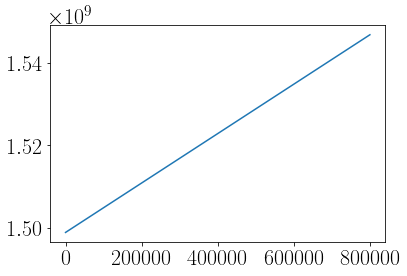

In [23]:
plt.plot(time_var)
plt.show()

In [24]:
counter = 0
for i, value in enumerate(pd.to_datetime(time_var,unit='s')):
    counter += 1 
print(counter)

memory = time_var[0]
calcs = []
for i, value in enumerate(time_var[1:]):
    calcs.append(value - memory)
    memory = time_var[i + 1]

800527


In [25]:
import numpy as np
calcs_arr = np.array(calcs)
print(np.max(calcs_arr))
print(np.min(calcs_arr))

60
60


In [26]:
unused_df = pd.DataFrame(pd.to_datetime(time_var,unit='s'))
unused_df

,0
0,2017-07-01 00:00:00
1,2017-07-01 00:01:00
2,2017-07-01 00:02:00
3,2017-07-01 00:03:00
4,2017-07-01 00:04:00
...,...
800522,2019-01-07 22:02:00
800523,2019-01-07 22:03:00
800524,2019-01-07 22:04:00
800525,2019-01-07 22:05:00


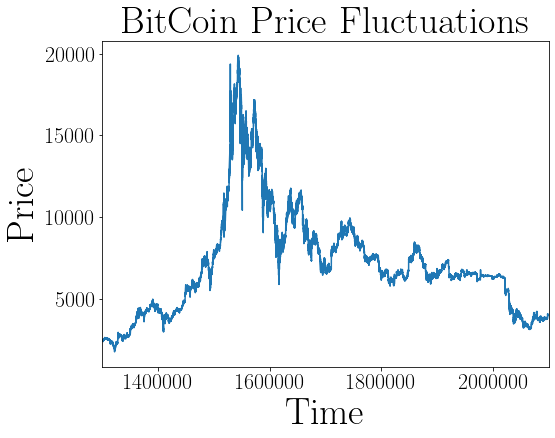

In [27]:
#Time series check
#Trends
data = pd.Series(df_inter)
data.plot(figsize=(8, 6))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
MEDIUM_SIZE = 28
plt.rc('font', size = MEDIUM_SIZE)      
plt.rc('axes', titlesize = MEDIUM_SIZE)     
plt.rc('axes', labelsize = MEDIUM_SIZE)    
plt.rc('xtick', labelsize = MEDIUM_SIZE)    
plt.rc('ytick', labelsize = MEDIUM_SIZE)    
plt.rc('legend', fontsize = MEDIUM_SIZE)    
plt.rc('figure', titlesize = MEDIUM_SIZE)
plt.xlabel("Time", fontsize=38)
plt.ylabel("Price", fontsize=38)
plt.title("BitCoin Price Fluctuations", fontsize=38)
plt.savefig("BitcoinPrices.pdf", bbox_inches='tight')
plt.show()

In [28]:
decomposed = sm.tsa.seasonal_decompose(data.values, freq=129600, model='additive')

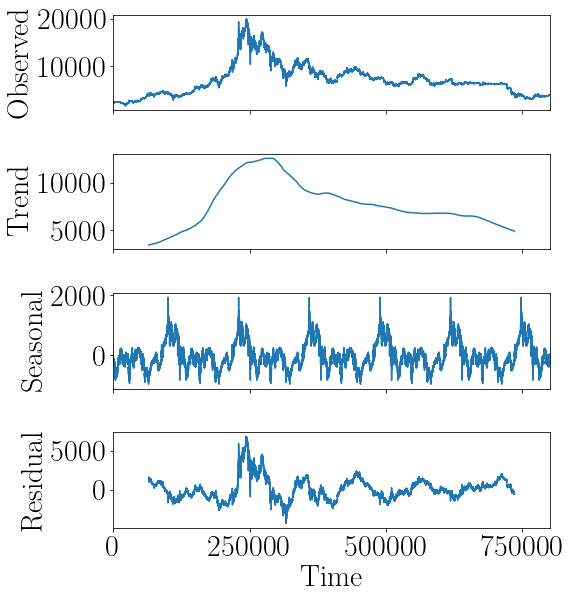

In [30]:
f = decomposed.plot()
plt.rcParams['figure.figsize'] = (9, 9)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
MEDIUM_SIZE = 30
plt.rc('font', size = MEDIUM_SIZE)      
plt.rc('axes', titlesize = MEDIUM_SIZE)     
plt.rc('axes', labelsize = MEDIUM_SIZE)    
plt.rc('xtick', labelsize = MEDIUM_SIZE)    
plt.rc('ytick', labelsize = MEDIUM_SIZE)    
plt.rc('legend', fontsize = MEDIUM_SIZE)    
plt.rc('figure', titlesize = MEDIUM_SIZE)
f.savefig("BitcoinSeasonal.pdf", bbox_inches='tight')
# f.savefig("Seasonal Decomposition.pdf")
plt.show()

In [24]:
#Save the processed data for the neural network ot train on
bitcoin_exp = df_inter.to_csv(r'bitcoin_exp.csv', index = None, header= False)